# Simple Linear Chain

Experiment: `/network/tmp1/chenant/ant/sr_trace/2021-02-14/22-30-00_chain/manual_combined`

Today: February 15, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files

Read the dfs, filter out the LSF value function agent from the `1228` runs and use the new LSF value function agent from the `1230` runs (which has the elig traces) for comparison.

In [2]:
sfAg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-14/22-30-00_chain/progress_epis-avg.csv'

pd_df_sep = '\|'

In [3]:
# LSF value function agent
sf_ag_raw_df = pd.read_csv(sfAg_in_path, sep=pd_df_sep)

/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
avg_Data_df = sf_ag_raw_df.copy(deep=True)
print(len(avg_Data_df))
avg_Data_df[0:3]

38400


,Unnamed: 0,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lr,sf_lr,reward_lr,...,episode_idx,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,sf_matrix_rmse,reward_vec_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg
0,0,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,...,99.5,12.015,0.998088,0.545720,0.545720,0.000000,0.118801,0.031840,0.001674,0.000000
1,1,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,...,99.5,12.015,0.998088,0.542644,0.536454,0.034072,0.118801,0.032466,0.001674,0.138820
2,2,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,...,99.5,12.015,0.998088,0.540850,0.531249,0.067926,0.118801,0.032910,0.001674,0.233505


In [5]:
episAvg_df = avg_Data_df.copy(deep=True)
del episAvg_df['Unnamed: 0']
print(list(episAvg_df))
print(len(episAvg_df))
episAvg_df[0:3]

['num_episodes', 'envCls_name', 'env_kwargs', 'agentCls_name', 'seed', 'gamma', 'lr', 'sf_lr', 'reward_lr', 'lamb', 'eta_trace', 'use_true_reward_params', 'use_true_sf_params', 'episode_idx', 'total_steps', 'cumulative_reward', 'v_fn_rmse', 'sf_G_rmse', 'sf_matrix_rmse', 'reward_vec_rmse', 'value_loss_avg', 'reward_loss_avg', 'sf_loss_avg']
38400


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lr,sf_lr,reward_lr,lamb,...,episode_idx,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,sf_matrix_rmse,reward_vec_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg
0,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,0.0,...,99.5,12.015,0.998088,0.545720,0.545720,0.000000,0.118801,0.031840,0.001674,0.000000
1,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,0.3,...,99.5,12.015,0.998088,0.542644,0.536454,0.034072,0.118801,0.032466,0.001674,0.138820
2,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.01,0.01,0.01,0.5,...,99.5,12.015,0.998088,0.540850,0.531249,0.067926,0.118801,0.032910,0.001674,0.233505


### Checks

In [6]:
print('envCls_name', set(episAvg_df['envCls_name']))
print('agentCls_name', set(episAvg_df['agentCls_name']))

envCls_name {'SimpleLinearChainEnv'}
agentCls_name {'SFReturnAgent'}


In [7]:
print(set(episAvg_df['env_kwargs']))

{"{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 2.0}", "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 10.0}", "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 0.1}", "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}", "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 1.0}"}


In [8]:
print('lamb', set(episAvg_df['lamb']))
print('eta_trace', set(episAvg_df['eta_trace']))
print('lr', set(episAvg_df['lr']))
print('sf_lr', set(episAvg_df['sf_lr']))
print('reward_lr', set(episAvg_df['reward_lr']))
print('seed', set(episAvg_df['seed']))
print('use_true_sf_params', set(episAvg_df['use_true_sf_params']))
print('use_true_reward_params', set(episAvg_df['use_true_reward_params']))


lamb {0.0, 0.5, 0.3, 0.9, 0.7, 1.0}
eta_trace {0.0}
lr {0.1, 0.01, 0.2, 0.3}
sf_lr {0.1, 0.01, 0.2, 0.3}
reward_lr {0.1, 0.01, 0.2, 0.3}
seed {2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40}
use_true_sf_params {False}
use_true_reward_params {False}


### Plot parameter study

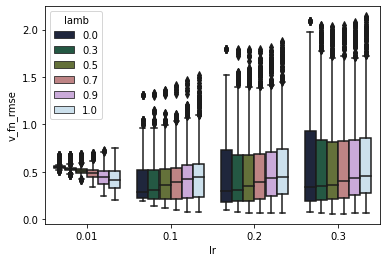

In [9]:
def lr_rmse_boxplot(data, x='lr', y='v_fn_rmse', hue='lamb', filters=None):
    # ==
    
    # ==
    # Filters
    if filters is None:
        filters = {
            'agentCls_name': 'SFReturnAgent',
            'eta_trace': 0.0,
            'use_true_sf_params': False,
            'use_true_reward_params': False,
        }
    
    df = data.copy(deep=True)
    for k in filters:
        df = df[df[k] == filters[k]]
    
    # round
    df[hue] = [round(e, 3) for e in df[hue]]
    # hues
    n_hues = len(set(df[hue].values))
    c_palette = sns.color_palette("cubehelix", n_hues) 
    
    
    sns.boxplot(x=x, y=y, hue=hue,
                 palette=c_palette,
                 data=df)
    
lr_rmse_boxplot(episAvg_df)  # example

No elig trace, LSF, fixed noise and reward, across SF learning rates

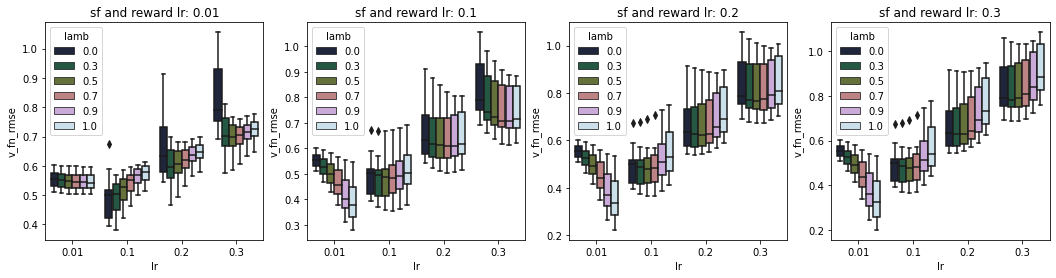

In [10]:
def script_sub_sf_reward_lrs():
    
    lr_list = [0.01, 0.1, 0.2, 0.3]
    
    plt.figure(figsize=(18,4))
    
    for i, cur_lr in enumerate(lr_list):

        plt.subplot(1,len(lr_list), i+1)
        
        lr_rmse_boxplot(
            episAvg_df, x='lr', y='v_fn_rmse', hue='lamb',
            filters={
                'agentCls_name': 'SFReturnAgent',
                'env_kwargs': "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}",
                'eta_trace': 0.0,
                'sf_lr': cur_lr,
                'reward_lr': cur_lr,
                'use_true_sf_params': False,
                'use_true_reward_params': False,
            }
        )
        
        plt.title(f'sf and reward lr: {cur_lr}')
        
script_sub_sf_reward_lrs()

Elig trace (trace parameter = 0.9), LSF, fixed noise and reward, across SF learning rates

In [ ]:
def script_sub_sf_reward_lrs():
    
    lr_list = [0.01, 0.1, 0.2, 0.3]
    
    plt.figure(figsize=(18,4))
    
    for i, cur_lr in enumerate(lr_list):

        plt.subplot(1,len(lr_list), i+1)
        
        lr_rmse_boxplot(
            episAvg_df, x='lr', y='v_fn_rmse', hue='lamb',
            filters={
                'agentCls_name': 'SFReturnAgent',
                'env_kwargs': "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}",
                'eta_trace': 0.9,
                'sf_lr': cur_lr,
                'reward_lr': cur_lr,
                'use_true_sf_params': False,
                'use_true_reward_params': False,
            }
        )
        
        plt.title(f'sf and reward lr: {cur_lr}')
        
script_sub_sf_reward_lrs()

## Best parameter 
### Helper method

In [13]:
def get_best_rmse_param_avg_df(in_avg_df):
    dep_col = 'v_fn_rmse'
    indep_cols = ['agentCls_name', 'lamb', 'eta_trace', 
                  'use_true_sf_params', 'use_true_reward_params']  # Need to be same?
    search_cols = ['lr', 'sf_lr', 'reward_lr']  # Need to be same?
    
    # ==
    avg_df = in_avg_df.copy(deep=True)
    min_idx = (avg_df.groupby(indep_cols)[dep_col].transform(min) 
                   == avg_df[dep_col])
    filter_df = avg_df[min_idx].reset_index()
    
    idxs = (pd.merge(avg_df, filter_df, 
                     on=(indep_cols + search_cols), how='left', 
                         indicator=True)['_merge'] 
            == 'both')
    
    # ==
    best_param_df = avg_df[idxs]
    return best_param_df
    
avg_best_param_df = get_best_rmse_param_avg_df(episAvg_df)
print(len(avg_best_param_df))
avg_best_param_df[0:2]

2100


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lr,sf_lr,reward_lr,lamb,...,episode_idx,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,sf_matrix_rmse,reward_vec_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg
288,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.3,0.01,0.01,0.0,...,99.5,12.015,0.998088,0.078414,0.078414,0.0,0.118801,0.003797,0.001674,0.0
294,200,SimpleLinearChainEnv,"{'n_states': 13, 'skip_prob': 0.1, 'terminal_r...",SFReturnAgent,2,0.9,0.3,0.01,0.10,0.0,...,99.5,12.015,0.998088,0.078414,0.078414,0.0,0.017491,0.003797,0.000254,0.0


### Plots

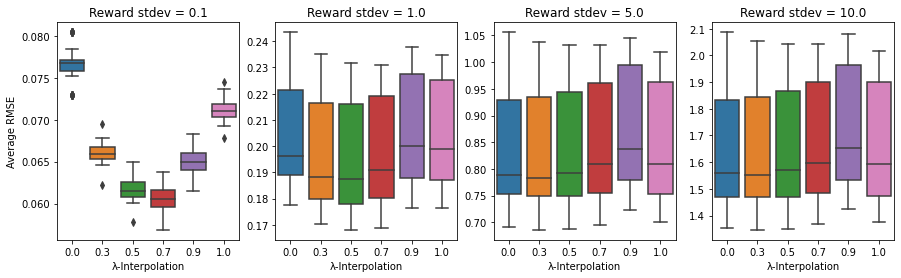

In [117]:
def script_subplt_best_lrs_rmses(best_df, y='v_fn_rmse'):
    # ==
    plt_x = 'lamb'
    plt_y = y
    
    env_kwargs_list = [
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 0.1}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 1.0}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}",
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 10.0}", 
    ]
    xlabel_list = [0.1, 1.0, 5.0, 10.0]
    
    # ==
    plt.figure(figsize=(15,4))
    
    for i, cur_env_kwargs in enumerate(env_kwargs_list):
                
        # Filter
        filters = {
            'agentCls_name': 'SFReturnAgent',
            'eta_trace': 0.0,
            'use_true_sf_params': False,
            'use_true_reward_params': False,
            'env_kwargs': cur_env_kwargs,
        }        
        df = best_df.copy(deep=True)
        for k in filters:
            df = df[df[k] == filters[k]]
            
        # Colors
        n_cols = len(set(df[plt_x].values))
        c_palette = sns.color_palette("tab10", n_cols+1) 
        # Manual setting to have corresponding colors
        del c_palette[-2]
        

        # Plot
        plt.subplot(1, len(env_kwargs_list), i+1)
        sns.boxplot(x=plt_x, y=plt_y, 
                    palette=c_palette,
                    data=df)
        
        # ylabel
        if i == 0:
            plt.ylabel('Average RMSE')
        else:
            plt.ylabel('')
        
        # xlabel and ticks
        plt.xlabel('λ-Interpolation')
        #plt.xticks(np.arange(6),[0.0,0.3,0.5,0.7,0.9,0.99,1.0])
        plt.title(f'Reward stdev = {xlabel_list[i]}')


script_subplt_best_lrs_rmses(avg_best_param_df, y='v_fn_rmse')

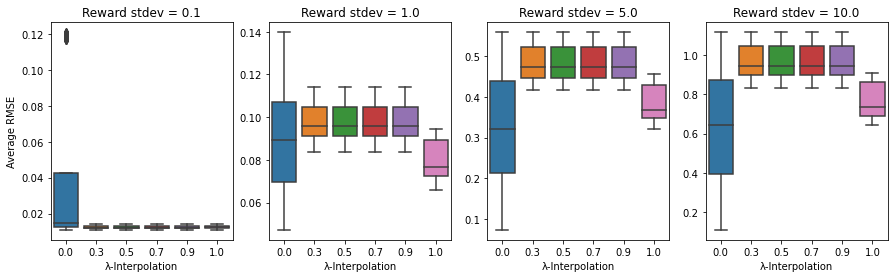

In [118]:
script_subplt_best_lrs_rmses(avg_best_param_df, y='reward_vec_rmse')

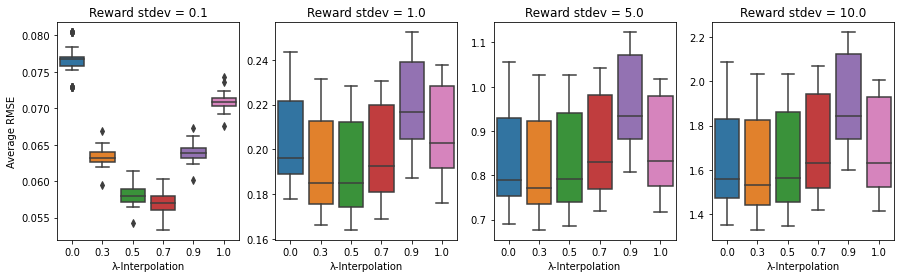

In [119]:
script_subplt_best_lrs_rmses(avg_best_param_df, y='sf_G_rmse')

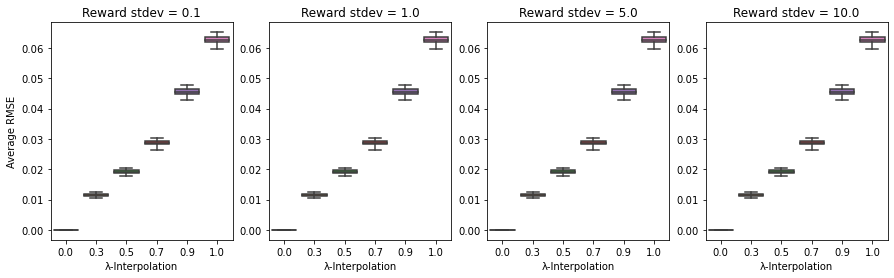

In [120]:
script_subplt_best_lrs_rmses(avg_best_param_df, y='sf_matrix_rmse')

### Compare different RMSEs

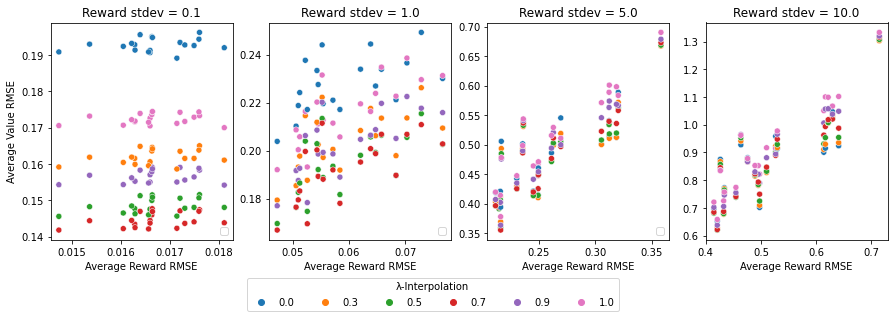

In [142]:
def script_plt_different_rmses(avg_df, x='reward_loss_avg', y='value_loss_avg'):
    # ==
    plt_x = x
    plt_y = y
    plt_hue = 'lamb'
    
    env_kwargs_list = [
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 0.1}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 1.0}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}",
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 10.0}", 
    ]
    xlabel_list = [0.1, 1.0, 5.0, 10.0]
    
    # ==
    plt.figure(figsize=(15,4))
    
    for i, cur_env_kwargs in enumerate(env_kwargs_list):
                
        # Filter
        filters = {
            'agentCls_name': 'SFReturnAgent',
            'lr': 0.1,
            'sf_lr': 0.1,
            'reward_lr': 0.1,
            'eta_trace': 0.0,
            'use_true_sf_params': False,
            'use_true_reward_params': False,
            'env_kwargs': cur_env_kwargs,
        }        
        df = avg_df.copy(deep=True)
        for k in filters:
            df = df[df[k] == filters[k]]
            
        n_hues = len(set(df[plt_hue].values))
        c_palette = sns.color_palette("tab10", n_hues+1) 
        # Manual setting to have corresponding colors
        del c_palette[-2]

        # Plot
        plt.subplot(1, len(env_kwargs_list), i+1)
        sns.scatterplot(x=plt_x, y=plt_y, hue=plt_hue,
                        palette=c_palette,
                        data=df)
        
        # ylabel
        if i == 0:
            plt.ylabel('Average Value RMSE')
        else:
            plt.ylabel('')
            
        # xlabel
        plt.xlabel('Average Reward RMSE')
        
        # Title
        plt.title(f'Reward stdev = {xlabel_list[i]}')
        
        # legend
        if i == (len(env_kwargs_list)-1):
            plt.legend(title='λ-Interpolation', 
                       #bbox_to_anchor=(1.05, 1), 
                       #loc='upper left')
                       bbox_to_anchor=[-1.5,-0.25],
                       ncol=n_hues,
                       loc='center')
        else:
            plt.legend([], loc='lower right')

        
script_plt_different_rmses(episAvg_df, x='reward_vec_rmse', y='v_fn_rmse')

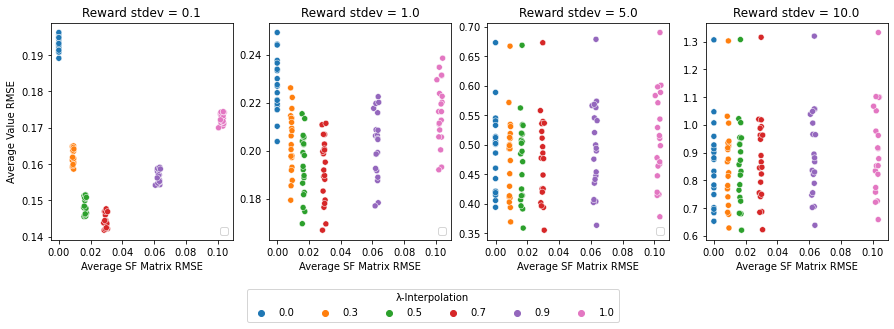

In [141]:
def script_plt_different_rmses(avg_df, x='reward_loss_avg', y='value_loss_avg'):
    # ==
    plt_x = x
    plt_y = y
    plt_hue = 'lamb'
    
    env_kwargs_list = [
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 0.1}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 1.0}", 
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 5.0}",
        "{'n_states': 13, 'skip_prob': 0.1, 'terminal_reward_stdev': 10.0}", 
    ]
    xlabel_list = [0.1, 1.0, 5.0, 10.0]
    
    # ==
    plt.figure(figsize=(15,4))
    
    for i, cur_env_kwargs in enumerate(env_kwargs_list):
                
        # Filter
        filters = {
            'agentCls_name': 'SFReturnAgent',
            'lr': 0.1,
            'sf_lr': 0.1,
            'reward_lr': 0.1,
            'eta_trace': 0.0,
            'use_true_sf_params': False,
            'use_true_reward_params': False,
            'env_kwargs': cur_env_kwargs,
        }        
        df = avg_df.copy(deep=True)
        for k in filters:
            df = df[df[k] == filters[k]]
            
        n_hues = len(set(df[plt_hue].values))
        c_palette = sns.color_palette("tab10", n_hues+1) 
        # Manual setting to have corresponding colors
        del c_palette[-2]

        # Plot
        plt.subplot(1, len(env_kwargs_list), i+1)
        sns.scatterplot(x=plt_x, y=plt_y, hue=plt_hue,
                        palette=c_palette,
                        data=df)
        
        # ylabel
        if i == 0:
            plt.ylabel('Average Value RMSE')
        else:
            plt.ylabel('')
            
        # xlabel
        plt.xlabel('Average SF Matrix RMSE')
        
        # Title
        plt.title(f'Reward stdev = {xlabel_list[i]}')
        
        # legend
        if i == (len(env_kwargs_list)-1):
            plt.legend(title='λ-Interpolation', 
                       bbox_to_anchor=[-1.5,-0.3],
                       ncol=n_hues,
                       loc='center')
        else:
            plt.legend([], loc='lower right')

        
script_plt_different_rmses(episAvg_df, x='sf_matrix_rmse', y='v_fn_rmse')